In [ ]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
#from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.plot import plot_confusion_matrix
#from jcopml.feature_importance import mean_score_decrease

#from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data2019 = pd.read_excel('/content/drive/MyDrive/c45/dataset_2019.xlsx')
data2019.head()

,NO.,ID Gel,Gelombang,No. Ujian,No.BRIVA PMB,NPM,Nama Peserta,Beda Nama,No. Identitas,Jenis Identitas,...,Status Lulus,Bayar DU,Tgl Bayar DU,ID TELLER,VER HUMASSAR,TGL VER HUM,USER HUM,DU SIA,CATATAN DU SIA,STATUS DATA DU SIA
0,1,21,Gel 1 S1,21.S1.1.0001,1202053434,NaN,BAYU DWI PRASETYO,NaN,3522200903989999,SIM,...,lulus,blm_bayar,NaN,NaN,Blm Verifikasi,NaN,-,tdk DU SIA,NaN,NaN
1,2,21,Gel 1 S1,21.S1.1.0002,1202045317,2.021104e+11,MAULANA AKBAR FADHILLAH,Tidak,3216181805990005,KTP,...,lulus,bayar DU,2021-01-20 13:21:53,888754.0,Terverifikasi,2021-01-20 20:31:22,Via Silviani,DU SIA,data sudah sesuai,0.0
2,3,21,Gel 1 S1,21.S1.1.0003,1202083267,2.021103e+11,MUHAMMAD FIKRI DAMANJAYA,Tidak,3175062508001001,KTP,...,lulus,bayar DU,2021-01-26 10:57:16,7212051.0,Terverifikasi,2021-02-03 22:10:13,Via Silviani,DU SIA,DATA LENGKAP,0.0
3,4,21,Gel 1 S1,21.S1.1.0004,1202021831,2.021107e+11,MUHAMMAD DICKY AL FARIDZI,NaN,3175061004001001,KTP,...,lulus,bayar DU,2021-01-27 18:49:55,888805.0,Terverifikasi,2021-02-04 00:31:47,Via Silviani,DU SIA,NaN,1.0
4,5,21,Gel 1 S1,21.S1.1.0005,1202093889,2.021101e+11,ALDEFA RHEVIZA,Tidak,3175043105981001,KTP,...,lulus,bayar DU,2021-01-18 21:46:15,888767.0,Terverifikasi,2021-02-06 12:34:52,Via Silviani,DU SIA,NaN,1.0


In [ ]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Columns: 106 entries, NO. to STATUS DATA DU SIA
dtypes: float64(22), int64(7), object(77)
memory usage: 1.7+ MB


In [ ]:
df_daftar_prodi=data2019[['Nama Prodi I','Nama Prodi II','Nama Prodi III']] 

In [ ]:
df_daftar_prodi.rename(columns = {'Nama Prodi I':'Nama_Prodi_I'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_daftar_prodi.rename(columns = {'Nama Prodi II':'Nama_Prodi_II'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_daftar_prodi.rename(columns = {'Nama Prodi III':'Nama_Prodi_III'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_daftar_prodiSatu=df_daftar_prodi[['Nama_Prodi_I']] 
df_daftar_prodiDua=df_daftar_prodi[['Nama_Prodi_II']] 
df_daftar_prodiTiga=df_daftar_prodi[['Nama_Prodi_III']] 

In [ ]:
df_daftar_prodiSatu

,Nama_Prodi_I
0,TEKNIK INDUSTRI
1,ILMU KOMUNIKASI
2,MANAJEMEN
3,INFORMATIKA
4,ILMU HUKUM
...,...
2154,ILMU HUKUM
2155,MANAJEMEN
2156,PSIKOLOGI
2157,INFORMATIKA


In [ ]:
df_daftar_prodiSatu.value_counts()

Nama_Prodi_I                    
ILMU KOMUNIKASI                     418
MANAJEMEN                           415
PSIKOLOGI                           278
INFORMATIKA                         275
ILMU HUKUM                          273
TEKNIK INDUSTRI                     194
AKUNTANSI                           155
PENDIDIKAN GURU SEKOLAH DASAR        59
TEKNIK KIMIA                         31
TEKNIK PERMINYAKAN                   25
PENDIDIKAN KEPELATIHAN OLAHRAGA      18
TEKNIK LINGKUNGAN                    18
dtype: int64

In [ ]:
df_daftar_prodiSatu.value_counts().head()

Nama_Prodi_I    
ILMU KOMUNIKASI     418
MANAJEMEN           415
PSIKOLOGI           278
INFORMATIKA         275
ILMU HUKUM          273
dtype: int64

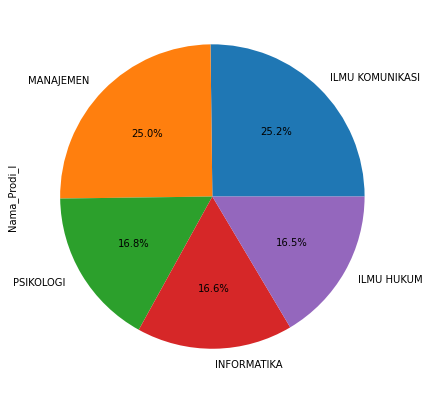

In [ ]:
df_daftar_prodiSatu['Nama_Prodi_I'].value_counts().head().plot(figsize=(7,7), kind='pie', autopct="%1.1f%%")

In [ ]:
df_daftar_prodiDua

,Nama_Prodi_II
0,PENDIDIKAN GURU SEKOLAH DASAR
1,MANAJEMEN
2,PSIKOLOGI
3,TEKNIK INDUSTRI
4,TEKNIK PERMINYAKAN
...,...
2154,ILMU HUKUM
2155,PENDIDIKAN KEPELATIHAN OLAHRAGA
2156,PSIKOLOGI
2157,MANAJEMEN


In [ ]:
df_daftar_prodiDua.value_counts().head()

Nama_Prodi_II   
MANAJEMEN           438
ILMU KOMUNIKASI     401
PSIKOLOGI           295
INFORMATIKA         232
ILMU HUKUM          199
dtype: int64

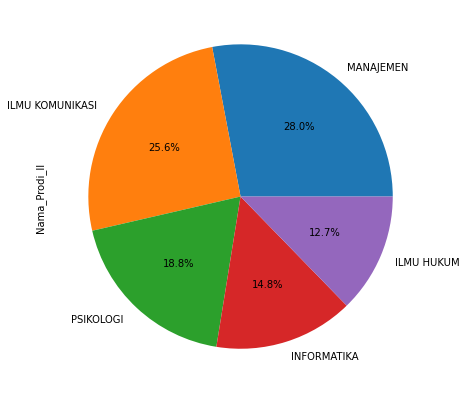

In [ ]:
df_daftar_prodiDua['Nama_Prodi_II'].value_counts().head().plot(figsize=(7,7), kind='pie', autopct="%1.1f%%")

In [ ]:
df_daftar_prodiTiga

,Nama_Prodi_III
0,PENDIDIKAN GURU SEKOLAH DASAR
1,MANAJEMEN
2,PSIKOLOGI
3,TEKNIK INDUSTRI
4,TEKNIK PERMINYAKAN
...,...
2154,ILMU HUKUM
2155,PENDIDIKAN KEPELATIHAN OLAHRAGA
2156,PSIKOLOGI
2157,MANAJEMEN


In [ ]:
df_daftar_prodiTiga.value_counts().head()

Nama_Prodi_III  
MANAJEMEN           438
ILMU KOMUNIKASI     401
PSIKOLOGI           295
INFORMATIKA         232
ILMU HUKUM          199
dtype: int64

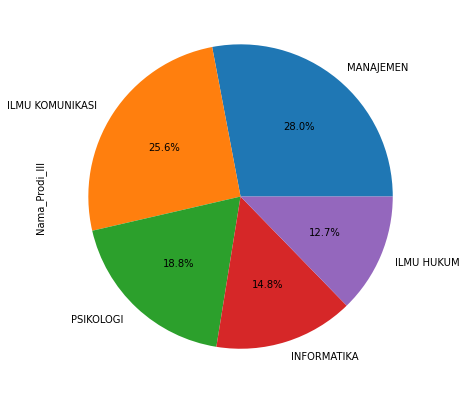

In [ ]:
df_daftar_prodiTiga['Nama_Prodi_III'].value_counts().head().plot(figsize=(7,7), kind='pie', autopct="%1.1f%%")

In [ ]:
df_daftar_2019 = data2019[['Nilai Raport Smt 4','Nilai Raport Smt 5','Nilai SKHUN','Nilai Transkrip/Ijazah','Kab/Kota','Kecamatan','Nama Sekolah','Status Lulus']] 

In [ ]:
df_daftar_2019

,Nilai Raport Smt 4,Nilai Raport Smt 5,Nilai SKHUN,Nilai Transkrip/Ijazah,Kab/Kota,Kecamatan,Nama Sekolah,Status Lulus
0,80.4,86.7,57.3,85.8,Kab. Bojonegoro,Kec. Kasiman,smk migas cepu,lulus
1,"84,5",88,"77,6",83,Kab. Bekasi,Kec. Setu,SMK Mitra Industri MM2100,lulus
2,73.57,78.3,58.125,78.5,Kota Jakarta Timur,Kec. Cakung,SMA Negeri 10 Bekasi,lulus
3,"80,18","83,44","39,12",82,Kota Jakarta Timur,Kec. Cakung,IPTEK JAKARTA,lulus
4,80,80,80,80,Kota Jakarta Timur,Kec. Kramat Jati,trampil 2 jakarta timur,lulus
...,...,...,...,...,...,...,...,...
2154,-,-,74.51,77.42,Kota Bekasi,Kec. Bekasi Barat,SMA YADIKA 9 BEKASI,lulus
2155,"82,2","81,57",-,"82,67",Kota Bekasi,Kec. Mustikajaya,SMAN 13 BEKASI,lulus
2156,"79,3",82,-,"80,55",Kota Bekasi,Kec. Medan Satria,SMAN 102 JAKARTA,lulus
2157,"83,26","84,14","74,86","83,60",Kota Bekasi,Kec. Mustikajaya,SMAN 5 Tambun Selatan,lulus


In [ ]:
df_daftar_2019.rename(columns = {'Kab/Kota':'Kab_atau_Kota'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_daftar_2019.rename(columns = {'Nama Sekolah':'Nama_Sekolah'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_daftar_2019.rename(columns = {'Nilai SKHUN':'Nilai_SKHUN'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_daftar_2019.rename(columns = {'Nilai Transkrip/Ijazah':'Nilai_Transkrip_atau_Ijazah'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_daftar_2019.rename(columns = {'Nilai Raport Smt 5':'Nilai_Raport_Smt_5'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_daftar_2019.rename(columns = {'Nilai Raport Smt 4':'Nilai_Raport_Smt_4'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_daftar_2019.rename(columns = {'Status Lulus':'Status_Lulus'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_daftar_2019.Status_Lulus.value_counts()

lulus                             2134
tidak lulus/msh proses seleksi      25
Name: Status_Lulus, dtype: int64

In [ ]:
df_daftar_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Nilai_Raport_Smt_4           2159 non-null   object
 1   Nilai_Raport_Smt_5           2159 non-null   object
 2   Nilai_SKHUN                  2076 non-null   object
 3   Nilai_Transkrip_atau_Ijazah  2105 non-null   object
 4   Kab_atau_Kota                2131 non-null   object
 5   Kecamatan                    2131 non-null   object
 6   Nama_Sekolah                 2131 non-null   object
 7   Status_Lulus                 2159 non-null   object
dtypes: object(8)
memory usage: 135.1+ KB


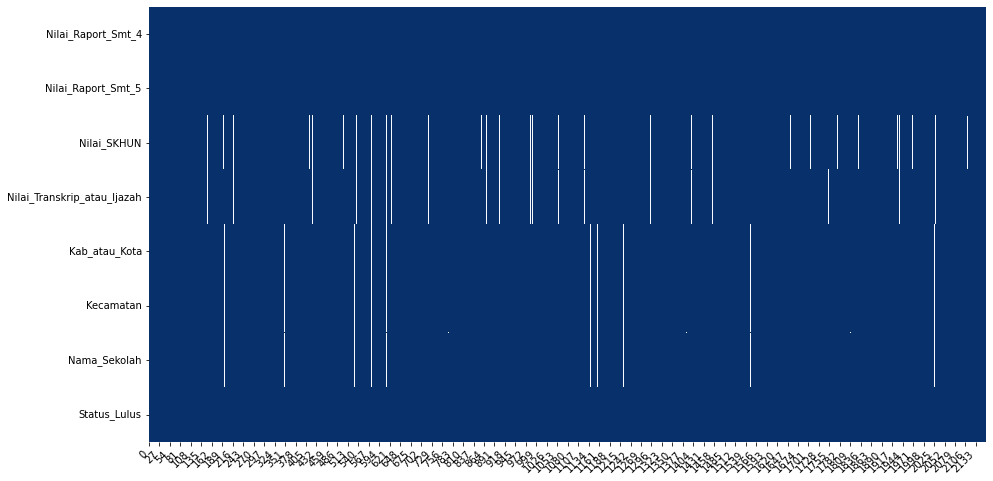

In [ ]:
plot_missing_value(df_daftar_2019)

In [ ]:
df_daftar_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Nilai_Raport_Smt_4           2159 non-null   object
 1   Nilai_Raport_Smt_5           2159 non-null   object
 2   Nilai_SKHUN                  2076 non-null   object
 3   Nilai_Transkrip_atau_Ijazah  2105 non-null   object
 4   Kab_atau_Kota                2131 non-null   object
 5   Kecamatan                    2131 non-null   object
 6   Nama_Sekolah                 2131 non-null   object
 7   Status_Lulus                 2159 non-null   object
dtypes: object(8)
memory usage: 135.1+ KB


In [ ]:
#Mengecek Missing Value
df_daftar_2019.isnull().sum()

Nilai_Raport_Smt_4              0
Nilai_Raport_Smt_5              0
Nilai_SKHUN                    83
Nilai_Transkrip_atau_Ijazah    54
Kab_atau_Kota                  28
Kecamatan                      28
Nama_Sekolah                   28
Status_Lulus                    0
dtype: int64

In [ ]:
df_daftar_2019 = df_daftar_2019.fillna({
                    'Kab/Kota': 'no_Kab/Kota'
})

In [ ]:
df_daftar_2019 = df_daftar_2019.fillna({
                   'Kecamatan': 'no_Kecamatan'
})

In [ ]:
df_daftar_2019 = df_daftar_2019.fillna({
                       'Nilai SKHUN': '0'
})

In [ ]:
df_daftar_2019 = df_daftar_2019.fillna({
                   'Nilai Transkrip/Ijazah': '0'
})

In [ ]:
df_daftar_2019 = df_daftar_2019.fillna(method='ffill', axis='columns')

In [ ]:
df_daftar_2019.head()

,Nilai_Raport_Smt_4,Nilai_Raport_Smt_5,Nilai_SKHUN,Nilai_Transkrip_atau_Ijazah,Kab_atau_Kota,Kecamatan,Nama_Sekolah,Status_Lulus
0,80.4,86.7,57.3,85.8,Kab. Bojonegoro,Kec. Kasiman,smk migas cepu,lulus
1,"84,5",88,"77,6",83,Kab. Bekasi,Kec. Setu,SMK Mitra Industri MM2100,lulus
2,73.57,78.3,58.125,78.5,Kota Jakarta Timur,Kec. Cakung,SMA Negeri 10 Bekasi,lulus
3,"80,18","83,44","39,12",82,Kota Jakarta Timur,Kec. Cakung,IPTEK JAKARTA,lulus
4,80,80,80,80,Kota Jakarta Timur,Kec. Kramat Jati,trampil 2 jakarta timur,lulus


In [ ]:
#Mengecek Missing Value
df_daftar_2019.isnull().sum()

Nilai_Raport_Smt_4             0
Nilai_Raport_Smt_5             0
Nilai_SKHUN                    0
Nilai_Transkrip_atau_Ijazah    0
Kab_atau_Kota                  0
Kecamatan                      0
Nama_Sekolah                   0
Status_Lulus                   0
dtype: int64

In [ ]:
df_daftar_2019.describe()

,Nilai_Raport_Smt_4,Nilai_Raport_Smt_5,Nilai_SKHUN,Nilai_Transkrip_atau_Ijazah,Kab_atau_Kota,Kecamatan,Nama_Sekolah,Status_Lulus
count,2159,2159,2159,2159,2159,2159,2159,2159
unique,929,935,657,740,82,142,1265,2
top,-,-,-,-,Kab. Bekasi,Kec. Tambun Selatan,no_Kecamatan,lulus
freq,93,93,1142,741,1000,336,28,2134


In [ ]:
df_clear = df_daftar_2019

In [ ]:
df_clear.loc[df_clear["Status_Lulus"] == "lulus", "Status_Lulus"] = 1

In [ ]:
df_clear.loc[df_clear["Status_Lulus"] == "tidak lulus/msh proses seleksi", "Status_Lulus"] = 0

In [ ]:
df_clear =df_clear.loc[df_clear.loc[:,"Status_Lulus"] == 1,:]

In [ ]:
df_clear =df_clear.loc[df_clear.loc[:,"Kab_atau_Kota"] == "Kab. Bekasi",:]

In [ ]:
df_clear

,Nilai_Raport_Smt_4,Nilai_Raport_Smt_5,Nilai_SKHUN,Nilai_Transkrip_atau_Ijazah,Kab_atau_Kota,Kecamatan,Nama_Sekolah,Status_Lulus
1,"84,5",88,"77,6",83,Kab. Bekasi,Kec. Setu,SMK Mitra Industri MM2100,1
5,79.57,82.14,-,-,Kab. Bekasi,Kec. Tambun Selatan,SMAN 7 Tambun Selatan,1
8,"85,2","85,80","52,125",85,Kab. Bekasi,Kec. Cibitung,SMA Jaya Suti Abadi,1
9,85.6,87.4,52.53,86,Kab. Bekasi,Kec. Tambun Utara,SMA NEGERI 2 TAMBUN UTARA,1
12,84,86,-,-,Kab. Bekasi,Kec. Tambun Utara,SMAN 1 TAMBUN Utara,1
...,...,...,...,...,...,...,...,...
2146,81,"81,25",81,76,Kab. Bekasi,Kec. Babelan,MA DARUL AMANAH,1
2147,"80,09","81,26",-,"77,53",Kab. Bekasi,Kec. Karang Bahagia,sma negeri 1 cikarang utara,1
2148,"79,57","81,71","81,71","80,90",Kab. Bekasi,Kec. Setu,SMA ALMUSLIM,1
2152,"84,44","83,74",-,"86,93",Kab. Bekasi,Kec. Babelan,SMK NEGERI 5 KOTA BEKASI,1


In [ ]:
pd.crosstab(df_clear.Kecamatan,df_clear.Status_Lulus).sort_values(1,ascending=False)

Status_Lulus,1
Kecamatan,
Kec. Tambun Selatan,333
Kec. Babelan,207
Kec. Tambun Utara,147
Kec. Cibitung,103
Kec. Setu,49
Kec. Tarumajaya,48
Kec. Cikarang Barat,42
Kec. Cikarang Utara,11
Kec. Cabangbungin,9


In [ ]:
df_clear[df_clear.Kecamatan == "Kec. Tambun Selatan"]

,Nilai_Raport_Smt_4,Nilai_Raport_Smt_5,Nilai_SKHUN,Nilai_Transkrip_atau_Ijazah,Kab_atau_Kota,Kecamatan,Nama_Sekolah,Status_Lulus
5,79.57,82.14,-,-,Kab. Bekasi,Kec. Tambun Selatan,SMAN 7 Tambun Selatan,1
23,79.9,82.38,45.5,79,Kab. Bekasi,Kec. Tambun Selatan,smk karya guna 1 bekasi,1
24,80,80,80,80,Kab. Bekasi,Kec. Tambun Selatan,SMK Mandalahayu Bekasi,1
26,"84,07","85,28","67,25",87,Kab. Bekasi,Kec. Tambun Selatan,SMA NEGERI 5 TAMBUN SELATAN,1
30,"84,85","87,78",-,"84,71",Kab. Bekasi,Kec. Tambun Selatan,SMA 2 TANGGERANG,1
...,...,...,...,...,...,...,...,...
2114,86,84,"81,56","85,25",Kab. Bekasi,Kec. Tambun Selatan,SMK Bintang Timur Bekasi,1
2115,"77,9","81,6",-,"81,42",Kab. Bekasi,Kec. Tambun Selatan,SMA Mubarokul Ulum,1
2124,78.83,78.17,43.625,81,Kab. Bekasi,Kec. Tambun Selatan,SMK YADIKA 13 TAMBUN,1
2131,80,86,-,86,Kab. Bekasi,Kec. Tambun Selatan,SMAN 8 Tambun Selatan,1


In [ ]:
df_clear_sekolah = df_clear[df_clear.Kecamatan == "Kec. Tambun Selatan"]

In [ ]:
pd.crosstab(df_clear_sekolah.Nama_Sekolah,df_clear_sekolah.Status_Lulus).sort_values(1,ascending=False)

Status_Lulus,1
Nama_Sekolah,
SMA NEGERI 3 TAMBUN SELATAN,9
SMK TELEKOMUNIKASI TELESANDI BEKASI,9
SMA NEGERI 6 TAMBUN SELATAN,8
SMAN 4 TAMBUN SELATAN,8
SMAN 1 TAMBUN SELATAN,7
...,...
SMAN 8 TAMBUN SELATAN,1
SMAN 8 Tambun Selatan,1
SMAN 8 tambun Selatan,1


In [ ]:
#Transormasi Data menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_daftar_2019 = df_daftar_2019.drop(['Nama_Sekolah', 'Kab_atau_Kota', 'Kecamatan'], axis=1)
df_daftar_2019.head()

,Nilai_Raport_Smt_4,Nilai_Raport_Smt_5,Nilai_SKHUN,Nilai_Transkrip_atau_Ijazah,Status_Lulus
0,80.4,86.7,57.3,85.8,1
1,"84,5",88,"77,6",83,1
2,73.57,78.3,58.125,78.5,1
3,"80,18","83,44","39,12",82,1
4,80,80,80,80,1


In [ ]:
df_daftar_2019['Status_Lulus']= le.fit_transform(df_daftar_2019['Status_Lulus'].values)
df_daftar_2019['Nilai_Raport_Smt_4']= le.fit_transform(df_daftar_2019['Nilai_Raport_Smt_4'].astype(str))
df_daftar_2019['Nilai_Raport_Smt_5']= le.fit_transform(df_daftar_2019['Nilai_Raport_Smt_5'].astype(str))
df_daftar_2019['Nilai_SKHUN']= le.fit_transform(df_daftar_2019['Nilai_SKHUN'].astype(str))
df_daftar_2019['Nilai_Transkrip_atau_Ijazah']= le.fit_transform(df_daftar_2019['Nilai_Transkrip_atau_Ijazah'].astype(str))


In [ ]:
df_daftar_2019

,Nilai_Raport_Smt_4,Nilai_Raport_Smt_5,Nilai_SKHUN,Nilai_Transkrip_atau_Ijazah,Status_Lulus
0,323,705,167,551,1
1,612,783,283,335,1
2,79,154,170,114,1
3,273,420,52,261,1
4,260,210,317,156,1
...,...,...,...,...,...
2154,2,2,270,98,1
2155,420,281,4,297,1
2156,205,325,4,176,1
2157,507,478,269,364,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
#df_daftar_2019 = scaler.fit_transform(df_daftar_2019)

In [ ]:
#pd.DataFrame(df_daftar_2019)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = df_daftar_2019.drop(columns='Status_Lulus')
y = df_daftar_2019['Status_Lulus']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1727, 4), (432, 4), (1727,), (432,))

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3
0,0.380388,0.372591,0.006116,0.006766
1,0.093750,0.143469,0.452599,0.029770
2,0.870690,0.958244,0.990826,0.964817
3,0.679957,0.807281,0.911315,0.006766
4,0.492457,0.709850,0.006116,0.006766
...,...,...,...,...
1722,0.526940,0.502141,0.264526,0.656292
1723,0.002155,0.002141,0.414373,0.113667
1724,0.350216,0.328694,0.006116,0.441137
1725,0.280172,0.224839,0.396024,0.353180


In [ ]:
pd.DataFrame(X_test)

,0,1,2,3
0,0.735421,0.786481,0.006098,0.486450
1,0.406048,0.440987,0.609756,0.406504
2,0.808855,0.853004,0.006098,0.861789
3,0.210583,0.284335,0.446646,0.005420
4,0.566955,0.585837,0.006098,0.585366
...,...,...,...,...
427,0.000000,0.000000,0.006098,0.386179
428,0.908207,0.837983,0.684451,0.662602
429,0.612311,0.670601,0.006098,0.550136
430,0.622030,0.762876,0.878049,0.823848


In [ ]:
import time
start = time.time() 

tree_product = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
#regressor = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=1)
tree_product.fit(X_train,y_train)

end = time.time()
process = round(end-start,2)
print("Waktu Training Decion Tree Regresi {} seconds".format(process))

Waktu Training Decion Tree Regresi 0.01 seconds


In [ ]:
start = time.time() 

predict_test = tree_product.predict(X_test)
cm = confusion_matrix(y_test, predict_test)
print("Confusion Matrix")
print(cm)
akurasi = classification_report(y_test, predict_test)
print("Tingkat Akurasi Algoritma C4.5")
print("Akurasi :", akurasi)
akurasi = accuracy_score(y_test, predict_test)
print("Tingkat Akurasi: %d persen" %(akurasi*100))

end = time.time()
process = round(end-start,2)
print("Waktu Testing Decion Tree Regresi {} seconds".format(process))

Confusion Matrix
[[  0   5]
 [  0 427]]
Tingkat Akurasi Algoritma C4.5
Akurasi :               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.99      1.00      0.99       427

    accuracy                           0.99       432
   macro avg       0.49      0.50      0.50       432
weighted avg       0.98      0.99      0.98       432

Tingkat Akurasi: 98 persen
Waktu Testing Decion Tree Regresi 0.04 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


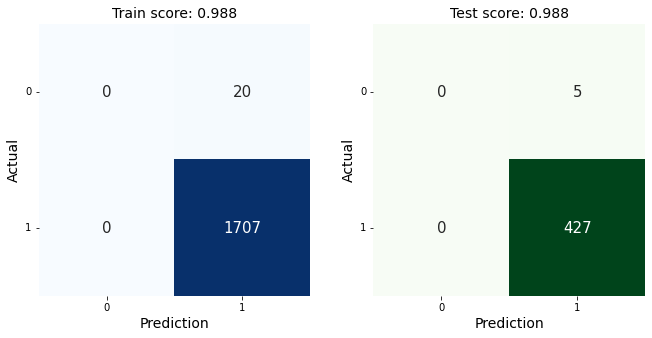

In [ ]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, tree_product)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree_product, out_file='pred.dot', class_names=["lulus", "tidak lulus"],
                feature_names=X.columns, impurity=False, filled=True)

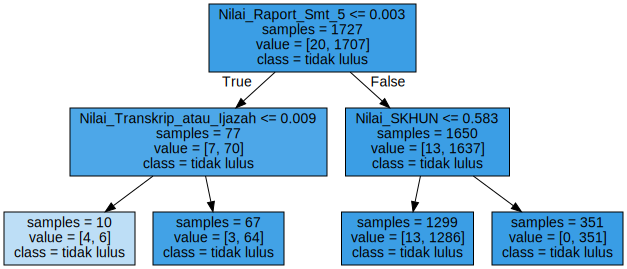

In [ ]:
import graphviz
with open('pred.dot') as fig: dot_graph = fig.read()

graphviz.Source(dot_graph)